# Análise Exploratória de Dados "Top Universities Ranking 2024"

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import re
warnings.filterwarnings("ignore")

In [5]:
df = pd.read_csv("shanghai_ranking_2024.csv")

In [7]:
df.shape

(1000, 9)

In [9]:
df.head()

,Rank,University_Name,National/Regional Rank,Alumni,Award,Hici,N&S,PUB,PCP
0,1,Harvard University,1,100.0,97.1,100.0,100.0,100.0,85.7
1,2,Stanford University,2,45.3,88.1,73.1,83.9,73.1,59.6
2,3,Massachusetts Institute of Technology (MIT),3,71.9,82.8,55.2,70.8,59.1,73.6
3,4,University of Cambridge,1,78.2,90.8,45.1,59.8,67.2,60.6
4,5,"University of California, Berkeley",4,65.3,76.5,46.9,62.8,57.1,55.5


In [11]:
df.tail()

,Rank,University_Name,National/Regional Rank,Alumni,Award,Hici,N&S,PUB,PCP
995,901-1000,Universidad Andrés Bello,4,0.0,0.0,6.5,4.0,21.1,9.5
996,901-1000,University of Lahore,3-5,0.0,0.0,0.0,1.4,27.5,11.7
997,901-1000,Linnaeus University,13,0.0,0.0,6.5,3.5,19.0,13.3
998,901-1000,University of Wuppertal,49-51,0.0,0.0,0.0,6.9,19.3,19.4
999,901-1000,Abdul Wali Khan University Mardan,3-5,0.0,0.0,6.5,3.8,20.9,9.4


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Rank                    1000 non-null   object 
 1   University_Name         1000 non-null   object 
 2   National/Regional Rank  1000 non-null   object 
 3   Alumni                  1000 non-null   float64
 4   Award                   1000 non-null   float64
 5   Hici                    1000 non-null   float64
 6   N&S                     989 non-null    float64
 7   PUB                     1000 non-null   float64
 8   PCP                     1000 non-null   float64
dtypes: float64(6), object(3)
memory usage: 70.4+ KB


In [15]:
df.rename(columns={'National/Regional Rank': 'National_Rank'}, inplace = True)

In [17]:
df.describe()

,Alumni,Award,Hici,N&S,PUB,PCP
count,1000.000000,1000.00000,1000.000000,989.000000,1000.000000,1000.000000
mean,4.509600,3.78120,10.734400,10.575126,35.113000,19.655300
std,10.103201,11.45538,10.949265,10.637247,13.684495,8.800436
min,0.000000,0.00000,0.000000,0.000000,9.300000,8.600000
25%,0.000000,0.00000,0.000000,3.900000,25.775000,14.100000
50%,0.000000,0.00000,9.200000,7.300000,31.700000,17.600000
75%,0.000000,0.00000,14.600000,13.300000,41.425000,23.000000
max,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000


# Limpeza dos dados

In [20]:
df.isnull().sum()

Rank                0
University_Name     0
National_Rank       0
Alumni              0
Award               0
Hici                0
N&S                11
PUB                 0
PCP                 0
dtype: int64

In [22]:
# Trocando os valores Nulos por 0 para as universidades que provavelmente não publicaram artigos ou não possuem score de publicação.

df['N&S'] = df['N&S'].fillna(0)

In [24]:
df.isnull().sum()

Rank               0
University_Name    0
National_Rank      0
Alumni             0
Award              0
Hici               0
N&S                0
PUB                0
PCP                0
dtype: int64

In [26]:
duplicatas = df[df.duplicated()]
duplicatas.head()

,Rank,University_Name,National_Rank,Alumni,Award,Hici,N&S,PUB,PCP


In [30]:
# Selecionando apenas as colunas numéricas dentro do intervalo desejado
variaveis_numericas = [
    col for col in df.columns[:48] if np.issubdtype(df[col].dtype, np.number)
]

# Exibir os tipos das colunas numéricas
for col in variaveis_numericas:
    print(f"{col}: {df[col].dtype}")

df[variaveis_numericas] = df[variaveis_numericas].astype(float)

Alumni: float64
Award: float64
Hici: float64
N&S: float64
PUB: float64
PCP: float64


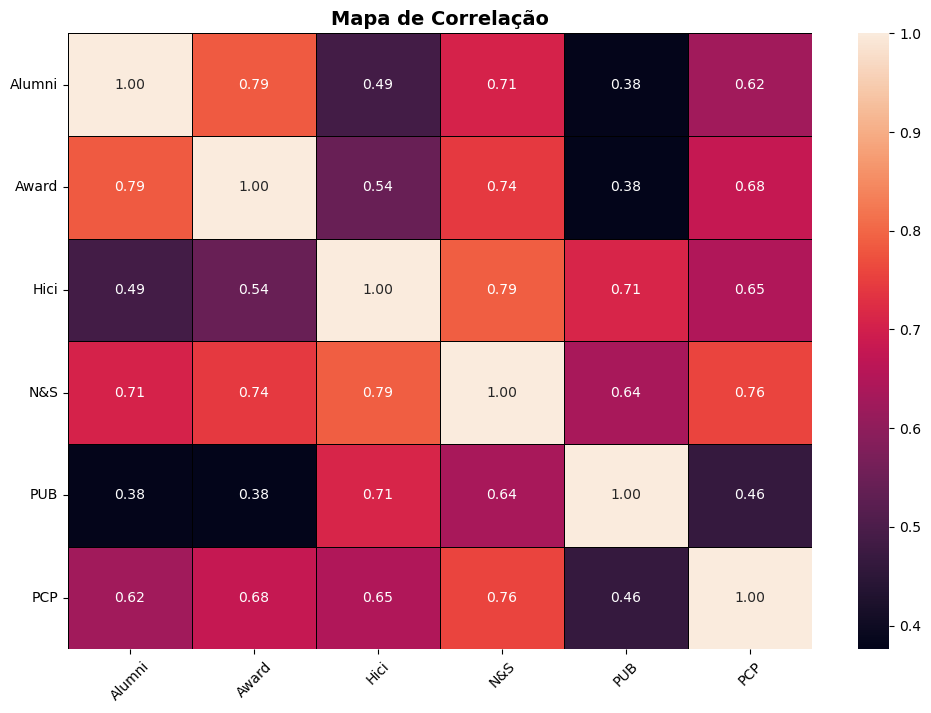

In [32]:
numerico_df = df.select_dtypes(include=[np.number])

numerico_df = numerico_df.fillna(0)

# Criando o mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(
    numerico_df.corr(), 
    annot=True, 
    fmt='.2f', 
    cmap="rocket", 
    linecolor='black', 
    linewidths=0.5,  # Ajusta as linhas separadoras
    cbar=True  # Exibe a barra de cores
)
plt.title('Mapa de Correlação', fontsize=14, fontweight='bold')  # Título mais destacado
plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo X para melhor legibilidade
plt.yticks(rotation=0)  # Mantém os rótulos do eixo Y legíveis
plt.show()

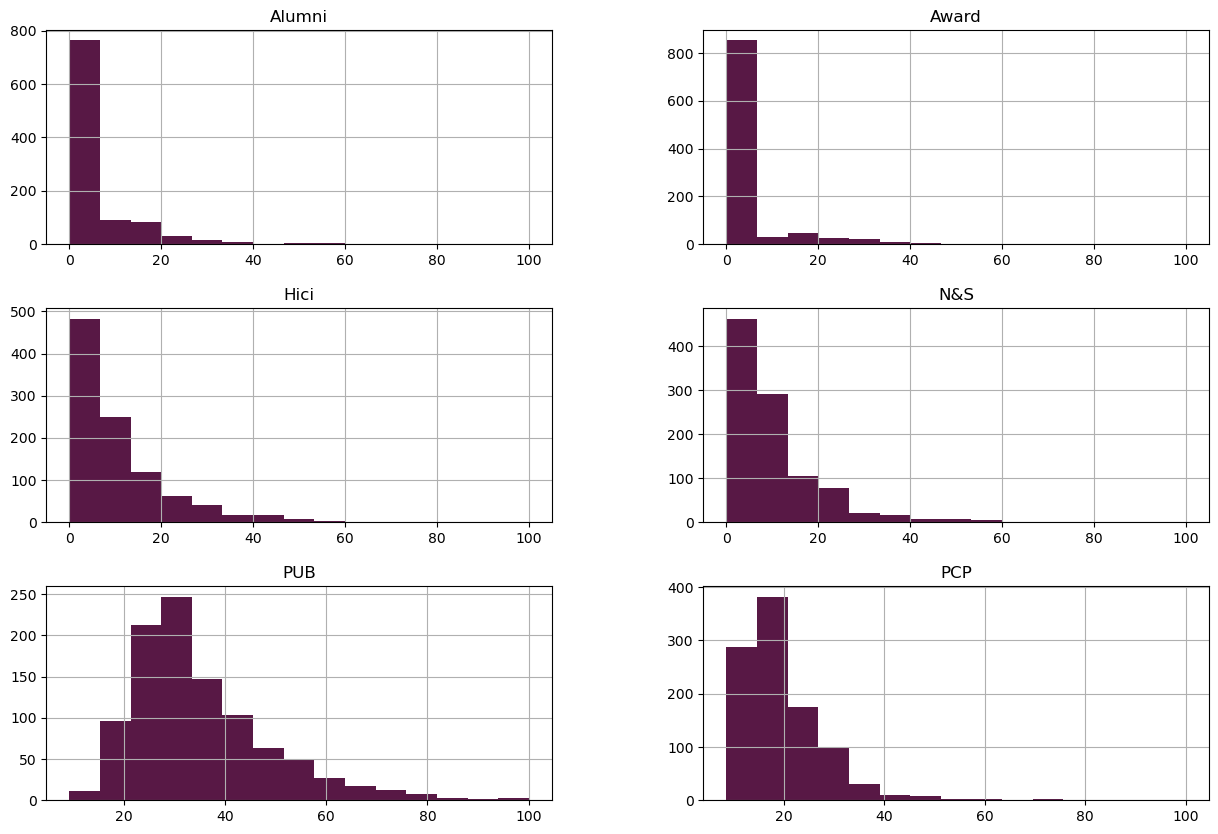

In [34]:
df[variaveis_numericas].hist(bins=15, figsize=(15, 10), color = '#581845')
plt.show()

In [36]:
# Contagem de categorias no ranking mundial e nacional
print(df['Rank'].value_counts())
print(df['National_Rank'].value_counts())

Rank
901-1000    100
801-900     100
701-800     100
601-700     100
501-600     100
           ... 
32            1
31            1
30            1
29            1
53            1
Name: count, Length: 87, dtype: int64
National_Rank
1          60
2          33
115-142    28
180-203    24
157-179    23
           ..
28          1
48          1
27          1
26          1
24          1
Name: count, Length: 130, dtype: int64


In [38]:
df_dados_Gen = df.groupby('University_Name')['Rank'].head(10)

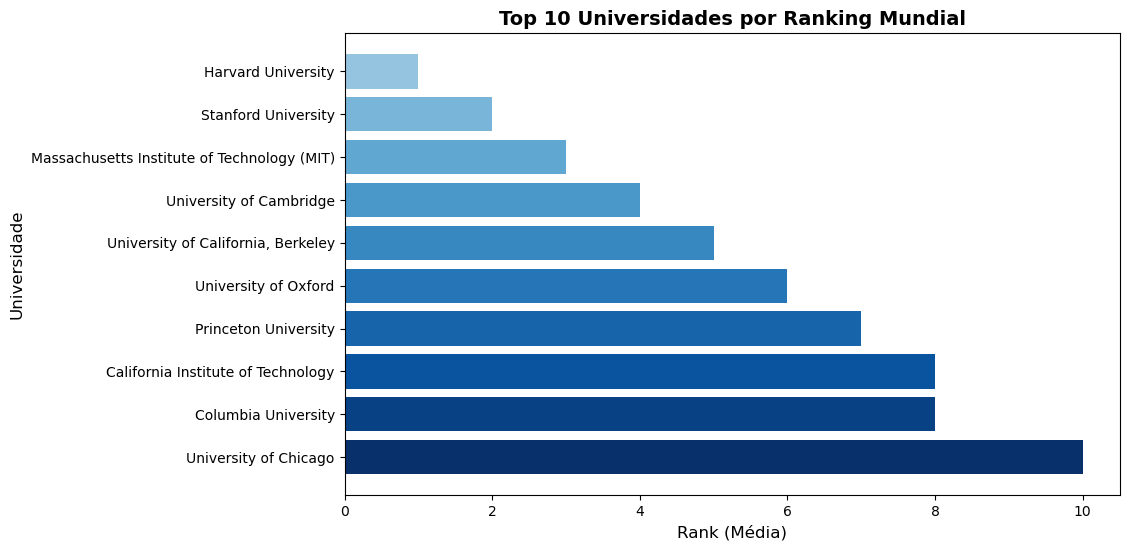

In [42]:
# Função para converter intervalos em médias numéricas
# try - except para evitar falhas caso a coluna tenha valores inesperados.
def converter_para_media(ranking):
    try:
        # regex para garantir que os valores sejam extraídos corretamente
        if '-' in ranking:
            inicio, fim = map(int, re.findall(r'\d+', ranking))  # Extraí números do intervalo
            return (inicio + fim) / 2
        else:
            return int(ranking)
    except ValueError:
        return None

# Aplicar conversão na coluna 'Rank'
df['Rank_numerico'] = df['Rank'].astype(str).apply(converter_para_media)

# Remover valores NaN gerados por possíveis erros de conversão
df = df.dropna(subset=['Rank_numerico'])

# Ordenar pelo Rank numérico e pegar os 10 primeiros
df_ordenado = df.sort_values(by='Rank_numerico').head(10)

# Criação do gráfico
plt.figure(figsize=(10, 6))
plt.barh(df_ordenado['University_Name'], df_ordenado['Rank_numerico'], color=plt.cm.Blues(np.linspace(0.4, 1, len(df_ordenado))))

plt.xlabel('Rank (Média)', fontsize=12)
plt.ylabel('Universidade', fontsize=12)
plt.title('Top 10 Universidades por Ranking Mundial', fontsize=14, fontweight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.gca().invert_yaxis()  # Inverter para mostrar o 1º no topo

plt.show()

## Domínio de Universidades Americanas:

- A maioria das universidades no Top 10 são dos Estados Unidos, incluindo instituições de prestígio como Harvard, Stanford, MIT, e Princeton. Isso reforça o fato de que o sistema de ensino superior americano continua a ser referência mundial, atraindo muitos estudantes internacionais e investimentos em pesquisa.
Universidades Britânicas de Destaque:

- As universidades britânicas, como a University of Cambridge e a University of Oxford, também ocupam posições de destaque, reforçando seu papel histórico e contínuo como centros globais de excelência acadêmica.

In [44]:
# Função para converter intervalos de ranking em médias numéricas
def converter_para_media(ranking):
    try:
        ranking = str(ranking).strip()  # Converte para string e remove espaços extras
        numeros = re.findall(r'\d+', ranking)  # Extrai apenas números
        if len(numeros) == 2:  # Caso seja um intervalo "X-Y"
            return (int(numeros[0]) + int(numeros[1])) / 2
        elif len(numeros) == 1:  # Caso seja um único valor "X"
            return int(numeros[0])
        else:
            return None  # Se não conseguir extrair um número válido
    except ValueError:
        return None  # Em caso de erro, retorna None para evitar falhas

# Criar uma cópia do DataFrame para evitar modificar o original
dfConvert = df.copy()

# Converter as colunas aplicando a função
dfConvert['Rank_numerico'] = dfConvert['Rank'].apply(converter_para_media)
dfConvert['National_Rank_numerico'] = dfConvert['National_Rank'].apply(converter_para_media)

# Criar a diferença entre ranking mundial e nacional
dfConvert['diferenca_ranking'] = dfConvert['Rank_numerico'] - dfConvert['National_Rank_numerico']

# Exibir o DataFrame com as novas colunas
print(dfConvert[['Rank', 'National_Rank', 'Rank_numerico', 'National_Rank_numerico', 'diferenca_ranking']])

         Rank National_Rank  Rank_numerico  National_Rank_numerico  \
0           1             1            1.0                     1.0   
1           2             2            2.0                     2.0   
2           3             3            3.0                     3.0   
3           4             1            4.0                     1.0   
4           5             4            5.0                     4.0   
..        ...           ...            ...                     ...   
995  901-1000             4          950.5                     4.0   
996  901-1000           3-5          950.5                     4.0   
997  901-1000            13          950.5                    13.0   
998  901-1000         49-51          950.5                    50.0   
999  901-1000           3-5          950.5                     4.0   

     diferenca_ranking  
0                  0.0  
1                  0.0  
2                  0.0  
3                  3.0  
4                  1.0  
..       

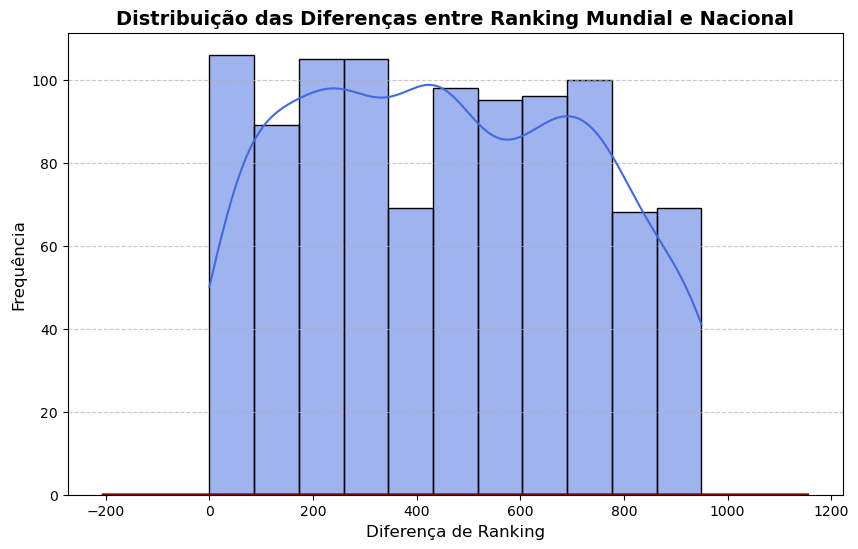

In [46]:
# Remover valores NaN para evitar problemas na visualização
dfConvert = dfConvert.dropna(subset=['diferenca_ranking'])

# Criar o histograma
plt.figure(figsize=(10, 6))
sns.histplot(dfConvert['diferenca_ranking'], kde=True, bins='auto', edgecolor='black', color='royalblue')

plt.title('Distribuição das Diferenças entre Ranking Mundial e Nacional', fontsize=14, fontweight='bold')
plt.xlabel('Diferença de Ranking', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

sns.kdeplot(dfConvert['diferenca_ranking'], color='darkred', linewidth=2)

plt.show()

- Observamos que há uma grande variação nas diferenças entre as posições das universidades nos rankings nacional e mundial, o que indica que muitas instituições têm desempenhos significativamente distintos em nível global em comparação com o cenário nacional.

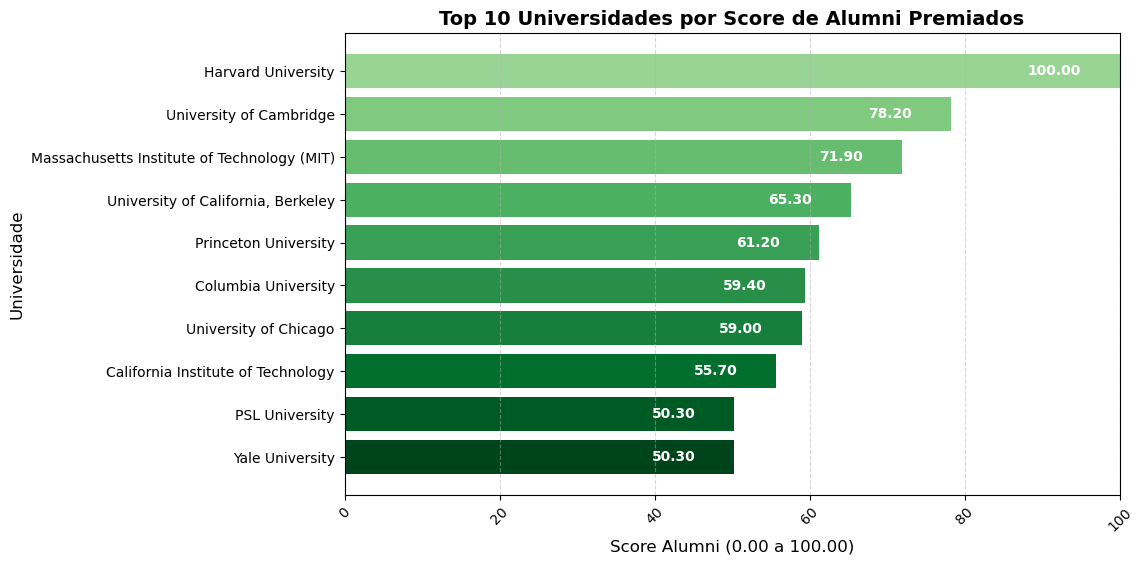

In [48]:
# Remover valores NaN para evitar problemas ao ordenar
df_ordenado = df.dropna(subset=['Alumni']).sort_values(by='Alumni', ascending=False).head(10)

# Criar a figura
plt.figure(figsize=(10, 6))
colors = plt.cm.Greens(np.linspace(0.4, 1, len(df_ordenado)))  # Gradiente de cores

# Criar o gráfico de barras horizontais
bars = plt.barh(df_ordenado['University_Name'], df_ordenado['Alumni'], color=colors)

# Adicionar anotações com os valores dos scores
for bar, score in zip(bars, df_ordenado['Alumni']):
    plt.text(score - 5, bar.get_y() + bar.get_height()/2, f'{score:.2f}', 
             ha='right', va='center', fontsize=10, color='white', fontweight='bold')

plt.xlabel('Score Alumni (0.00 a 100.00)', fontsize=12)
plt.ylabel('Universidade', fontsize=12)
plt.title('Top 10 Universidades por Score de Alumni Premiados', fontsize=14, fontweight='bold')
plt.xlim(0, 100)  # Limitar eixo X entre 0 e 100
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.5)  # Adiciona uma grade leve no eixo X

plt.show()

- Harvard University em Destaque:
Harvard University lidera o ranking com o score de Alumni mais alto, próximo de 100, destacando-se como a instituição com o maior número de ex-alunos premiados ou com maior reconhecimento. Isso reflete o impacto de sua rede de ex-alunos no cenário global, especialmente em prêmios de prestígio como o Nobel ou o Pulitzer.
Domínio de Universidades Americanas:

- Das 10 instituições, a maioria são universidades americanas, como MIT, Princeton, Columbia, Yale e University of California, Berkeley, demonstrando o domínio contínuo das universidades dos Estados Unidos na formação de profissionais de destaque.
Cambridge e PSL como Destaques Europeus:

- A presença da University of Cambridge e da PSL University no top 10 indica que, embora o cenário seja dominado pelas universidades dos EUA, algumas universidades europeias ainda possuem um papel de destaque na formação de líderes e personalidades influentes.


- O fato de que todas essas universidades estão no topo em termos de score de Alumni demonstra que o prestígio dos ex-alunos é um fator crucial para o ranking. Universidades que conseguem formar líderes e premiados internacionalmente tendem a ter uma reputação acadêmica muito forte.
Possível Associação com Recursos:

- As universidades no topo deste ranking, como MIT, Caltech, e Harvard, são conhecidas por terem grandes recursos financeiros e investimentos em pesquisa. Isso sugere que infraestrutura, qualidade acadêmica e oportunidades oferecidas por essas instituições podem ser fatores que contribuem para o sucesso de seus ex-alunos.

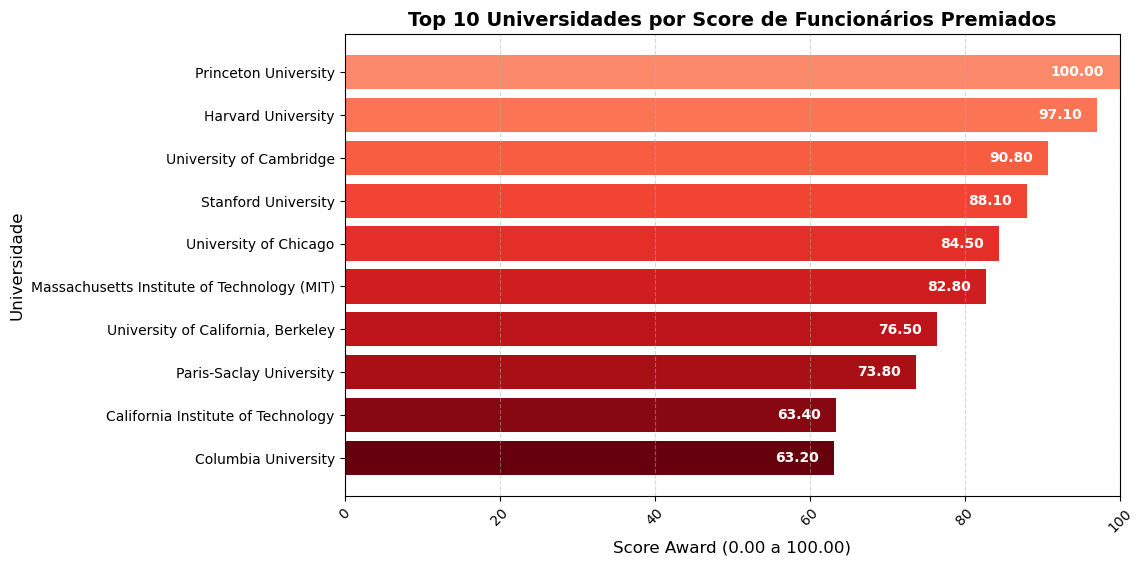

In [50]:
# Remover valores NaN para garantir que apenas dados válidos sejam usados
df_ordenado = df.dropna(subset=['Award']).sort_values(by='Award', ascending=False).head(10)

plt.figure(figsize=(10, 6))
colors = plt.cm.Reds(np.linspace(0.4, 1, len(df_ordenado)))  # Gradiente de cores

bars = plt.barh(df_ordenado['University_Name'], df_ordenado['Award'], color=colors)

# Adicionar anotações com os valores dos scores
for bar, score in zip(bars, df_ordenado['Award']):
    plt.text(score - 2, bar.get_y() + bar.get_height()/2, f'{score:.2f}', 
             ha='right', va='center', fontsize=10, color='white', fontweight='bold')

plt.xlabel('Score Award (0.00 a 100.00)', fontsize=12)
plt.ylabel('Universidade', fontsize=12)
plt.title('Top 10 Universidades por Score de Funcionários Premiados', fontsize=14, fontweight='bold')
plt.xlim(0, 100)  # Limitar o eixo X entre 0 e 100
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.5)

plt.show()

- Póssível causalidade com Alumnis: Temos 80% das universidades que estavam no ranking de alunos premiados também o que pode indicar uma possível causalidade de que um aluno premiado tera seu professor ou tutor premiado também.

- Dominância das Universidades Norte-Americanas: As universidades norte-americanas dominam o ranking, ocupando 8 das 10 primeiras posições. Isso sugere que, pelo menos nesse quesito, as instituições de ensino superior dos Estados Unidos se destacam.

- Princeton e Harvard na Liderança: Princeton e Harvard, duas das universidades mais prestigiadas do mundo, ocupam as duas primeiras posições. Isso reforça a reputação dessas instituições em diversos aspectos, incluindo o reconhecimento de seus funcionários.

- Presença Internacional: Apesar da predominância norte-americana, a lista inclui a Universidade de Cambridge (Reino Unido) e a Paris-Saclay University (França), demonstrando que o reconhecimento não se restringe a uma única região.

- Competitividade Acirrada: A diferença entre as pontuações das universidades do topo do ranking não é tão grande, o que indica uma alta competitividade entre essas instituições no que diz respeito ao reconhecimento de seus funcionários.

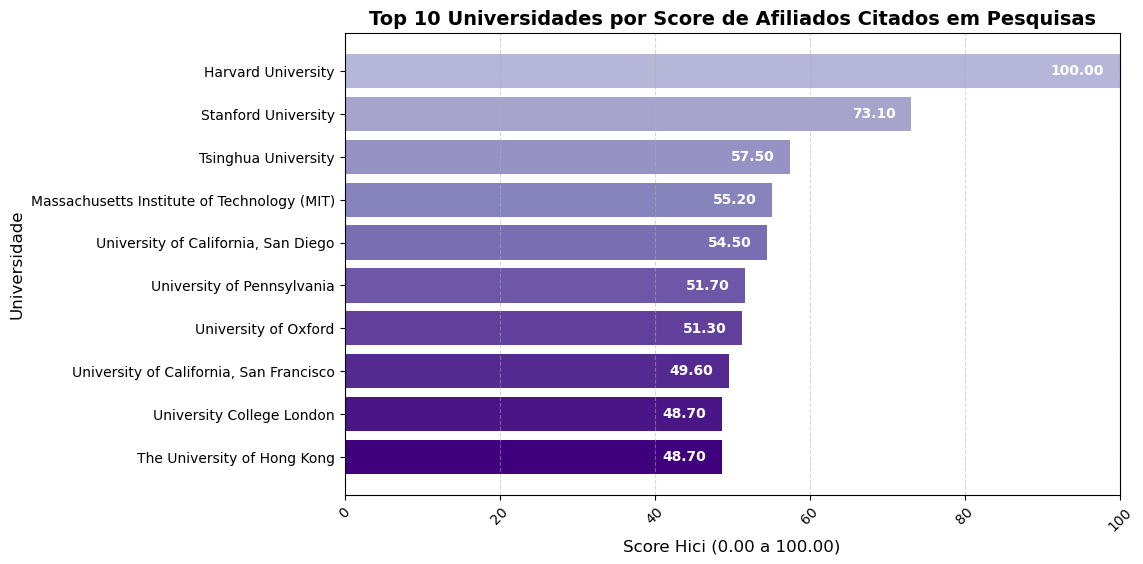

In [52]:
# Remover valores NaN para garantir que apenas dados válidos sejam usados
df_ordenado = df.dropna(subset=['Hici']).sort_values(by='Hici', ascending=False).head(10)

plt.figure(figsize=(10, 6))
colors = plt.cm.Purples(np.linspace(0.4, 1, len(df_ordenado)))  # Gradiente de cores roxas

bars = plt.barh(df_ordenado['University_Name'], df_ordenado['Hici'], color=colors)

# Adicionar anotações com os valores dos scores
for bar, score in zip(bars, df_ordenado['Hici']):
    plt.text(score - 2, bar.get_y() + bar.get_height()/2, f'{score:.2f}', 
             ha='right', va='center', fontsize=10, color='white', fontweight='bold')

plt.xlabel('Score Hici (0.00 a 100.00)', fontsize=12)
plt.ylabel('Universidade', fontsize=12)
plt.title('Top 10 Universidades por Score de Afiliados Citados em Pesquisas', fontsize=14, fontweight='bold')
plt.xlim(0, 100)  # Limitar o eixo X entre 0 e 100
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.5)

plt.show()

- Dominância das Universidades Norte-Americanas: Novamente as universidades dos Estados Unidos dominam o topo do ranking, com Harvard e Stanford ocupando as duas primeiras posições. Isso reforça a reputação dessas instituições como líderes globais em pesquisa e inovação.

- Presença Internacional: Apesar da forte presença norte-americana, o ranking também inclui universidades de outros continentes, como a Tsinghua University (China), a University of Oxford (Reino Unido) e a University of Hong Kong. Isso indica que a excelência em pesquisa não se restringe a uma única região.

- Foco em Pesquisa: O alto score das universidades listadas sugere um forte investimento em pesquisa, com produção científica de alta qualidade e grande impacto na comunidade acadêmica.

- Diversidade de Áreas: A presença de universidades com diferentes focos (como as voltadas para ciências da saúde, como a University of California, San Francisco, e as mais generalistas, como Harvard e Stanford) sugere que a excelência em pesquisa se manifesta em diversas áreas do conhecimento.

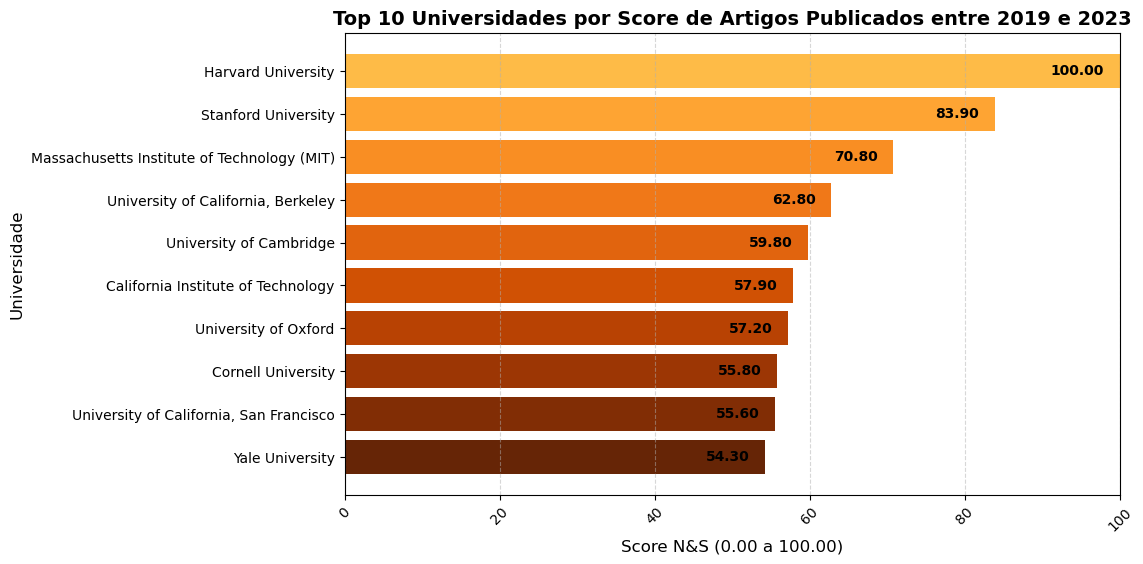

In [54]:
# Remover valores NaN para garantir que apenas dados válidos sejam usados
df_ordenado = df.dropna(subset=['N&S']).sort_values(by='N&S', ascending=False).head(10)

plt.figure(figsize=(10, 6))
colors = plt.cm.YlOrBr(np.linspace(0.4, 1, len(df_ordenado)))  # Gradiente de cores amarelo

bars = plt.barh(df_ordenado['University_Name'], df_ordenado['N&S'], color=colors)

# Adicionar anotações com os valores dos scores
for bar, score in zip(bars, df_ordenado['N&S']):
    plt.text(score - 2, bar.get_y() + bar.get_height()/2, f'{score:.2f}', 
             ha='right', va='center', fontsize=10, color='black', fontweight='bold')

plt.xlabel('Score N&S (0.00 a 100.00)', fontsize=12)
plt.ylabel('Universidade', fontsize=12)
plt.title('Top 10 Universidades por Score de Artigos Publicados entre 2019 e 2023', fontsize=14, fontweight='bold')
plt.xlim(0, 100)  # Limitar o eixo X entre 0 e 100
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.5)

plt.show()

- Domínio das Universidades Americanas: Mais uma vez a maioria das universidades no top 10 são dos Estados Unidos, indicando a liderança contínua das instituições americanas em pesquisa acadêmica.

- Harvard University na Liderança: Harvard está no topo, o que não é surpreendente, dado seu histórico de excelência em diversas áreas de pesquisa.
  
- Forte Presença da Califórnia: Universidades como Stanford, UC Berkeley e Caltech mostram que a Califórnia é um polo significativo de inovação e pesquisa.

- Presença do Reino Unido: As universidades de Cambridge e Oxford representam bem o Reino Unido, destacando-se como centros de pesquisa de renome mundial.

- Diversidade de Áreas de Pesquisa: As universidades listadas são conhecidas por suas contribuições em uma ampla gama de disciplinas, desde ciências exatas até ciências humanas e sociais.
  
- Competição Acirrada: A proximidade das pontuações sugere uma competição intensa entre essas instituições para manter e melhorar suas posições no ranking.

Novamente temos os americanos domindando com 100% estando no top 10, o que nos mostra que grande parte dos artigos vem de estudos americanos. Varios fatores influenciam isso principalmente como incentivo a educação e orçamento ao país para stranegeiros nao s incluirem no top

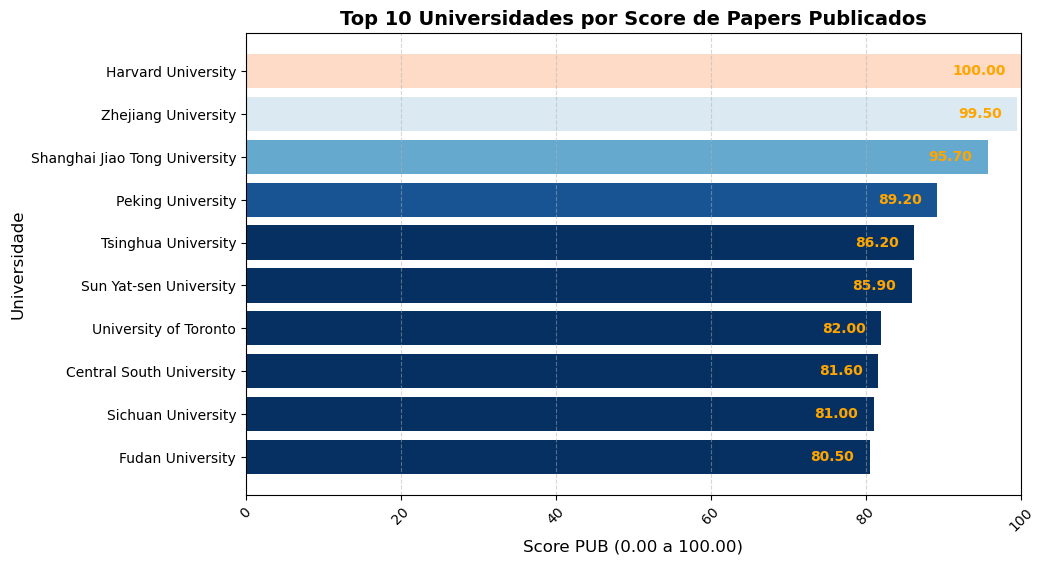

In [72]:
# Remover valores NaN para garantir que apenas dados válidos sejam usados
df_ordenado = df.dropna(subset=['PUB']).sort_values(by='PUB', ascending=False).head(10)

plt.figure(figsize=(10, 6))
colors = plt.cm.RdBu(np.linspace(0.4, 2, len(df_ordenado)))  # Gradiente de cores vermelhas

bars = plt.barh(df_ordenado['University_Name'], df_ordenado['PUB'], color=colors)

# Adicionar anotações com os valores dos scores
for bar, score in zip(bars, df_ordenado['PUB']):
    plt.text(score - 2, bar.get_y() + bar.get_height()/2, f'{score:.2f}', 
             ha='right', va='center', fontsize=10, color='orange', fontweight='bold')

plt.xlabel('Score PUB (0.00 a 100.00)', fontsize=12)
plt.ylabel('Universidade', fontsize=12)
plt.title('Top 10 Universidades por Score de Papers Publicados', fontsize=14, fontweight='bold')
plt.xlim(0, 100)  # Limitar o eixo X entre 0 e 100
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.5)

plt.show()

- Dominância Asiática: A presença massiva de universidades chinesas no topo do ranking demonstra uma mudança significativa no cenário global da pesquisa acadêmica. Zhejiang, Shanghai Jiao Tong, Peking e Tsinghua ocupam as primeiras posições, superando instituições norte-americanas historicamente reconhecidas.

- Investimento em Pesquisa: O resultado é um reflexo direto dos massivos investimentos chineses em educação e pesquisa nas últimas décadas. O governo chinês tem priorizado a ciência e a tecnologia como motores de crescimento econômico e desenvolvimento nacional.

- Política de Internacionalização: As universidades chinesas têm buscado a internacionalização, incentivando a publicação em revistas de alto impacto e a colaboração com pesquisadores estrangeiros.

Diferentemente do score de artigos temos uma grande domninancia da China na publicação de papers, Harvard sendo o unico integrante americano mas seguido por pouco da universidade chinesa de zheijang. Canadá tem um representante com a universidade de Toronto e temos 80% dos papers sendo publicados por chineses.

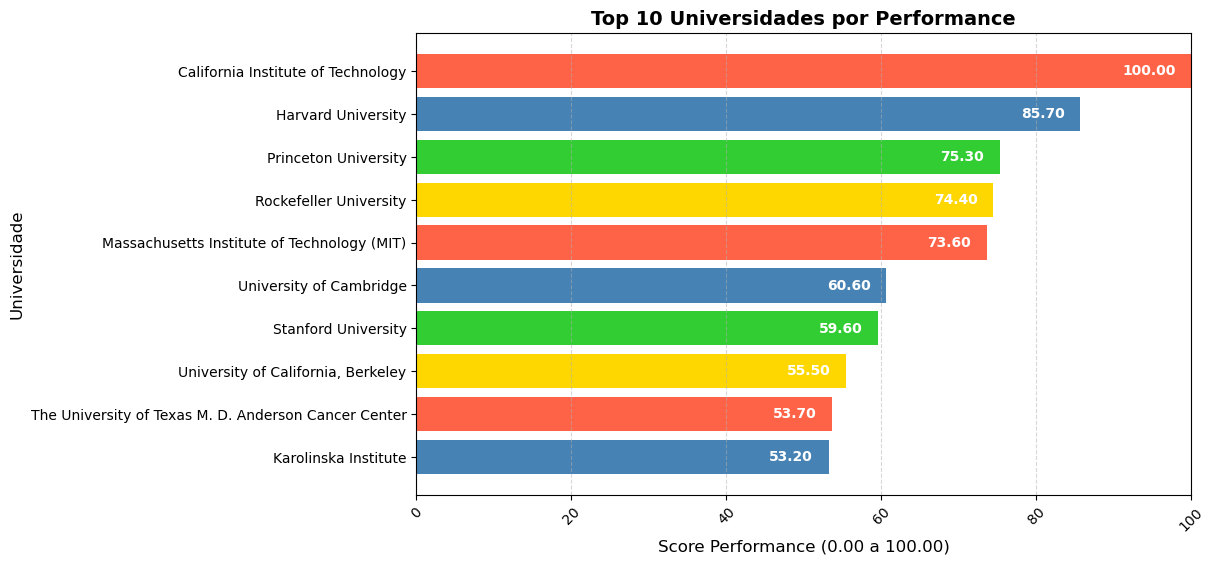

In [77]:
# Remover valores NaN para garantir que apenas dados válidos sejam usados
df_ordenado = df.dropna(subset=['PCP']).sort_values(by='PCP', ascending=False).head(10)

plt.figure(figsize=(10, 6))

colors = plt.cm.viridis(np.linspace(0.4, 1, len(df_ordenado)))

bars = plt.barh(df_ordenado['University_Name'], df_ordenado['PCP'], color=cores)

# Adicionar anotações com os valores dos scores
for bar, score in zip(bars, df_ordenado['PCP']):
    plt.text(score - 2, bar.get_y() + bar.get_height()/2, f'{score:.2f}', 
             ha='right', va='center', fontsize=10, color='white', fontweight='bold')

plt.xlabel('Score Performance (0.00 a 100.00)', fontsize=12)
plt.ylabel('Universidade', fontsize=12)
plt.title('Top 10 Universidades por Performance', fontsize=14, fontweight='bold')
plt.xlim(0, 100)  # Limitar o eixo X entre 0 e 100
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.5)

plt.show()

### Perfomance: Pontuações ponderadas dos cinco indicadores acima divididas pelo número de docentes equivalentes a tempo inteiro.

- Liderança: Temos uma surpresa que mesmo com Harvard liderando a maioria dos scores ele não figura na liderança de performance pois O Instituto de Tecnologia da California tem um aproveitamento claramente superior provavelmente sendo explicado pelo numero de docentes equivalentes

- Concentração nos EUA: A maioria das universidades no topo do ranking estão localizadas nos Estados Unidos. Isso reforça a posição dos EUA como um líder global em educação superior e pesquisac contando com apenas com 2 representantes estrangeiros Ubiversidade de Cambridge da Inglaterra e Instituto de Karolinska da Suécia

- Excelência Acadêmica: A concentração de instituições norte-americanas indica um alto nível de excelência acadêmica, infraestrutura de pesquisa e recursos disponíveis nessas universidades.

### Diversidade de Áreas de Foco:
- Ciências Exatas e da Vida: Instituições como o California Institute of Technology, MIT e Rockefeller University são conhecidas por sua excelência em ciências exatas e da vida, indicando um forte foco em pesquisa nessas áreas.
- Ciências Humanas e Sociais: A presença de universidades como Harvard e Stanford demonstra que a excelência também se estende às áreas de humanidades e ciências sociais.
